# Increasing Operational Efficiency and Profits Through Coffee Shop Sales Analysis Using Machine Learning

## About Dataset

The dataset covers sales activities within a local coffee shop, encompassing a range of information such as transaction records and product details. By analyzing this data using SQL queries and data analysis techniques, we aim to uncover valuable insights that can inform decision-making and drive business growth.

### 1. Overview of the Dataset

The dataset is divided into three tables, with each column labeled according to its function. The following sections provide an overview of each table's structure as well as an entity-relationship diagram of the three tables. To enhance visualization, we using Python's Pandas package.

In [16]:
# Load dataset
import pandas as pd
df = pd.read_csv('Project.csv')
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


## Data Cleaning

### Missing Values

In [17]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

### Duplicate

In [18]:
df.duplicated().any()

False

## Feature Encoding

In [19]:
df = df.drop(columns=['transaction_id',
                      'transaction_date',
                      'transaction_time',
                      'store_id',
                      'product_id',
                      'Day of Week',
                      'product_type',
                      'product_detail'])

In [20]:
mapping_store = {
    'Astoria' : 1,
    "Hell's Kitchen" : 2,
    'Lower Manhattan' : 3
}

df['store_location'] = df['store_location'].map(mapping_store)

In [21]:
mapping_product = {
    'Bakery' : 1,
    'Branded' : 2,
    'Coffee' : 3,
    'Coffee beans' : 4,
    'Drinking Chocolate' : 5,
    'Flavours' : 6,
    'Loose Tea' : 7,
    'Packaged Chocolate' : 8,
    'Tea' : 9
}

df['product_category'] = df['product_category'].map(mapping_product)

In [22]:
mapping_size = {
    'Large' : 1, 
    'Not Defined' : 2, 
    'Regular' : 3, 
    'Small' : 4
}

df['Size'] = df['Size'].map(mapping_size)

In [23]:
mapping_day = {
    'Monday' : 1, 
    'Tuesday' : 2, 
    'Wednesday' : 3, 
    'Thursday' :4,
    'Friday' : 5, 
    'Saturday' : 6,
    'Sunday' : 7
}

df['day'] = df['Day Name'].map(mapping_day)

In [24]:
df = df.drop(columns=['Month Name', 'Day Name'])

In [25]:
df.head()

,store_location,transaction_qty,unit_price,Total_Bill,product_category,Size,Hour,Month,day
0,1,1,3.0,3.0,9,1,11,6,4
1,1,1,3.0,3.0,9,1,11,6,5
2,1,1,3.0,3.0,9,1,12,6,5
3,1,1,3.0,3.0,9,1,19,6,5
4,1,1,3.0,3.0,9,1,12,6,6


## Feature Transformation

<Axes: >

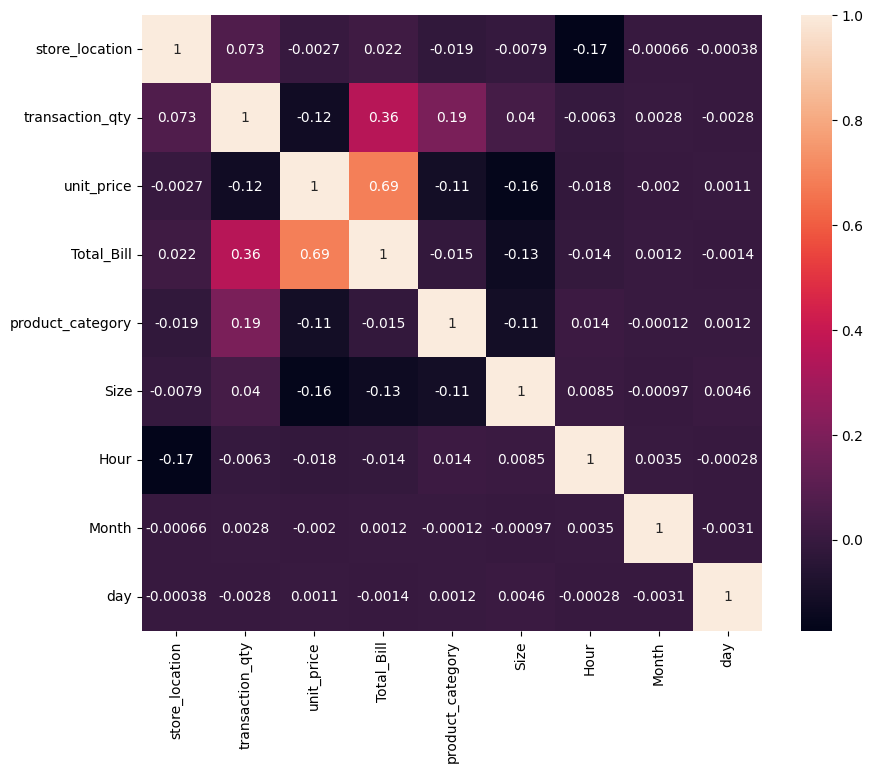

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True)

## Modeling

### Decision Trees

In [45]:
X = df.drop(columns=['Total_Bill'])
y = df['Total_Bill']

In [52]:
def randomforest(X, y, test_size=0.2, random_state=42):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    from sklearn.preprocessing import StandardScaler
    st_x = StandardScaler()
    X_train = st_x.fit_transform(X_train)
    X_test = st_x.transform(X_test)

    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae_train = mean_absolute_error(y_train, X_train_prediction)
    mse_train = mean_squared_error(y_train, X_train_prediction)
    rmse_train = mean_squared_error(y_train, X_train_prediction, squared=False)
    r2_train = r2_score(y_train, X_train_prediction)
    
    mae_test = mean_absolute_error(y_test, X_test_prediction)
    mse_test = mean_squared_error(y_test, X_test_prediction)
    rmse_test = mean_squared_error(y_test, X_test_prediction, squared=False)
    r2_test = r2_score(y_test, X_test_prediction)

    return {print('Mean Absolute Error (Train) =', mae_train),
            print('Mean Squared Error (Train) =', mse_train),
            print('Root Mean Squared Error (Train) =', rmse_train),
            print('R² Score (Train) =', r2_train),
            print('Mean Absolute Error (Test) =', mae_test),
            print('Mean Squared Error (Test) =', mse_test),
            print('Root Mean Squared Error (Test) =', rmse_test),
            print('R² Score (Test) =', r2_test)}

In [53]:
randomforest(X, y)

Mean Absolute Error (Train) = 0.00014747426483108822
Mean Squared Error (Train) = 0.0011271422748382125
Root Mean Squared Error (Train) = 0.033572939621638924
R² Score (Train) = 0.9999330980263953
Mean Absolute Error (Test) = 0.0002930525751092341
Mean Squared Error (Test) = 0.0025612795064377694
Root Mean Squared Error (Test) = 0.05060908521636969
R² Score (Test) = 0.9998833151569331


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{None}

## Summary

### 1. Mean Absolute Error (MAE)
- **Train**: 0.000147474
- **Test**: 0.000293053

**MAE** measures the average absolute difference between predicted values and actual values. A very small MAE value indicates that the model's predictions are very close to the actual values.

### 2. Mean Squared Error (MSE)
- **Train**: 0.001127142
- **Test**: 0.002561280

**MSE** measures the average of the squared differences between predicted values and actual values. A small MSE value means the model’s average prediction error is low. Since MSE includes squared errors, it is more sensitive to outliers.

### 3. Root Mean Squared Error (RMSE)
- **Train**: 0.033573
- **Test**: 0.050609

**RMSE** is the square root of MSE and provides an error measure in the same units as the target variable. A small RMSE indicates that the model's predictions are quite close to the actual values.

### 4. R² Score (Coefficient of Determination)
- **Train**: 0.999933098
- **Test**: 0.999883315

**R² Score** measures the proportion of the variance in the target variable that is explained by the model. R² values range from 0 to 1, where values close to 1 indicate that the model explains most of the variance in the data. A very high R² score means that the model is excellent at predicting values for both the training and test datasets.

### Summary of Results

- **Model Performance**: Your model appears to perform exceptionally well on both the training and test datasets, with very low MAE, MSE, and RMSE values indicating minimal prediction errors.
- **Overfitting**: Since the metrics for the training and test data are very similar and close to optimal values, this suggests that the model is likely not overfitting and can generalize well to unseen data.
- **Model Fit**: The R² Score close to 1 indicates that the model is very effective in explaining the variance in the data.

Overall, your regression model performs very well with low prediction errors and a high ability to explain data variance.